# World Bank Dataset on Youth Employment and other Indicators

In [2]:
import numpy as np
import scipy as scp
import pandas as pd 
import warnings 

warnings.filterwarnings("ignore")

yu = pd.read_csv('../data-visualization/API_ILO_country_YU.csv')

In [3]:
yu_sort_lastyr = yu.sort(['2014'],ascending = True)

In [4]:
yu_sort_lastyr.head(10)

,Country Name,Country Code,2010,2011,2012,2013,2014
168,Rwanda,RWA,0.7,0.7,0.7,0.7,0.7
102,Cambodia,KHM,0.9,0.7,0.5,0.7,0.9
165,Qatar,QAT,1.5,1.7,1.6,1.2,1.3
69,Guinea,GIN,1.9,1.4,1.4,1.5,1.7
12,Benin,BEN,2.0,2.0,2.0,1.8,1.7
121,"Macao SAR, China",MAC,5.3,5.8,5.0,3.5,2.9
68,Ghana,GHA,11.4,9.4,7.4,1.9,3.3
106,Lao PDR,LAO,3.2,3.2,3.3,3.3,3.4
99,Kazakhstan,KAZ,6.0,5.3,4.6,4.1,3.5
192,Thailand,THA,4.0,2.9,3.1,3.2,3.9


In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm 

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import seaborn as sns

%matplotlib inline
%pylab inline

#--------script to choose color---------#
# from tkinter import *
# from tkinter.colorchooser import *
# def getColor():
#     color = askcolor() 
#     print(color)
# Button(text='Select Color', command=getColor).pack()
# mainloop()

Populating the interactive namespace from numpy and matplotlib


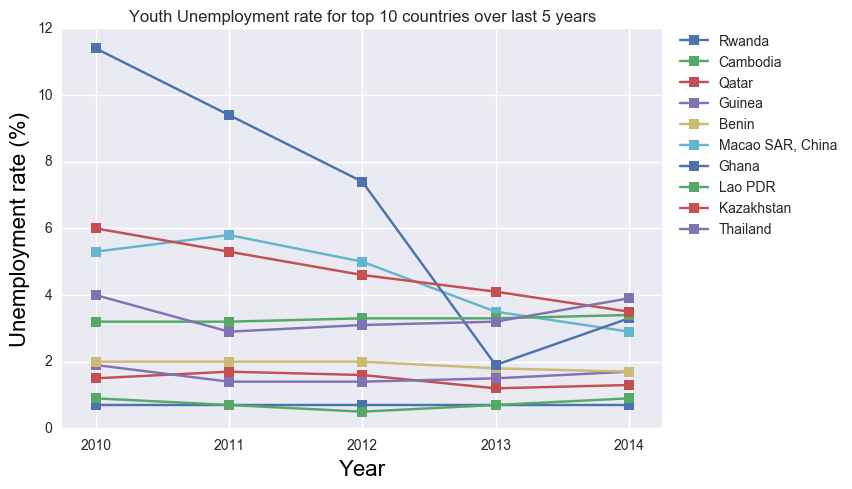

In [6]:
yu_top_10 = yu_sort_lastyr.head(10)
yu_bottom_10 = yu_sort_lastyr.tail(10)

country_top_10 = yu_top_10['Country Name']
country_bottom_10 = yu_bottom_10['Country Name']
country_top_10 = np.array(country_top_10)
country_bottom_10 = np.array(country_bottom_10)

yu_top_10 = yu_top_10.drop(['Country Name','Country Code'], axis = 1)
yu_bottom_10 = yu_bottom_10.drop(['Country Name','Country Code'], axis = 1)

yu_top_10 = yu_top_10.reset_index(drop=True)
yu_bottom_10 = yu_bottom_10.reset_index(drop=True)
labels = ['2010','2011','2012','2013','2014']

plt.figure()
x = np.arange(0,5)
for i in range(0,yu_top_10.shape[0]):
    y = yu_top_10.ix[i]
    y = np.array(y)
    legend_label = country_top_10[i]
    plt.plot(x,y,'-s', label = legend_label)
    
plt.xticks(x, labels)
plt.xlabel("Year",color = "k",size = '16')
plt.ylabel("Unemployment rate (%)",color = "k",size = '16')
plt.title('Youth Unemployment rate for top 10 countries over last 5 years')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=0, bottom=0, right=1.0, top=1, wspace=0, hspace=0)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,x1 + plot_margin,y0 - 0,y1 + 0))
plt.show()

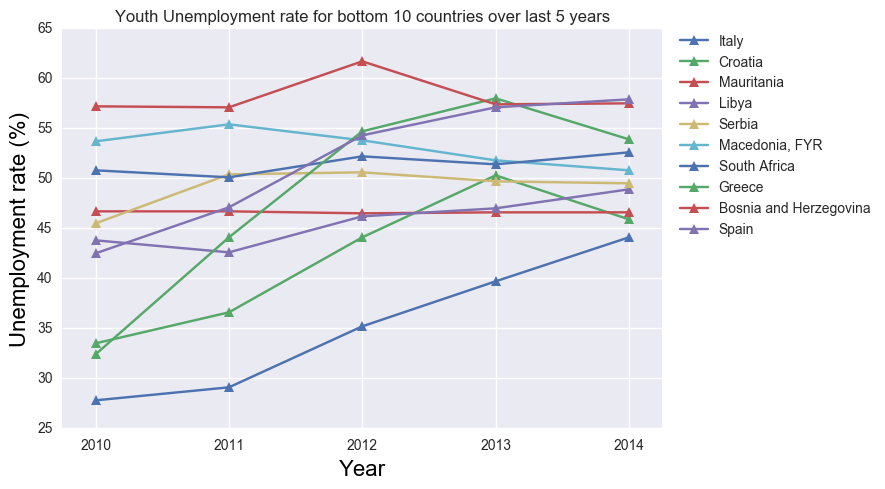

In [7]:
plt.figure()
x = np.arange(0,5)
for i in range(0,yu_top_10.shape[0]):
    y = yu_bottom_10.ix[i]
    y = np.array(y)
    legend_label = country_bottom_10[i]
    plt.plot(x,y,'-^', label = legend_label)
    
plt.xticks(x, labels)
plt.xlabel("Year",color = "k",size = '16')
plt.ylabel("Unemployment rate (%)",color = "k",size = '16')
plt.title('Youth Unemployment rate for bottom 10 countries over last 5 years')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=0, bottom=0, right=1.0, top=1, wspace=0, hspace=0)
plot_margin = 0.25

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,x1 + plot_margin,y0 - 0,y1 + 0))
plt.show()

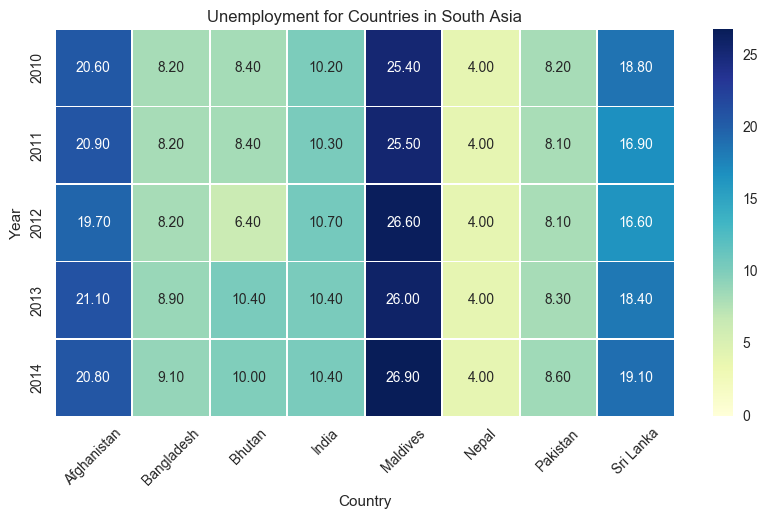

In [8]:
country = ['Afghanistan','Bangladesh','Bhutan','India','Pakistan','Nepal','Maldives','Sri Lanka']
years = ['2010','2011','2012','2013','2014']
columns = ['Country','Year','Unemployment']
country_sasia = pd.DataFrame(columns=columns) #empty dataframe
    
for country_name in country:
    curr_country = yu_sort_lastyr[yu_sort_lastyr['Country Name'] == country_name]
    for year in years:
        values = curr_country[year].values[0] #df.values computes the entries as a numpy array or list
        entry = pd.DataFrame([[country_name,year,values]],columns=columns)
        country_sasia = country_sasia.append(entry)
country_sasia.head(20)

table_sasia = pd.pivot_table(data = country_sasia,
                            index = ['Year'],
                            columns = ['Country'],
                            values = ['Unemployment'],
                            aggfunc = 'mean')
plt.figure(figsize=(10,5))
ax = sns.heatmap(data = table_sasia['Unemployment'],vmin=0,annot=True,fmt='2.2f',linewidth = 0.5,cmap="YlGnBu")
plt.title('Unemployment for Countries in South Asia')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)

In [9]:
from geonamescache import GeonamesCache
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

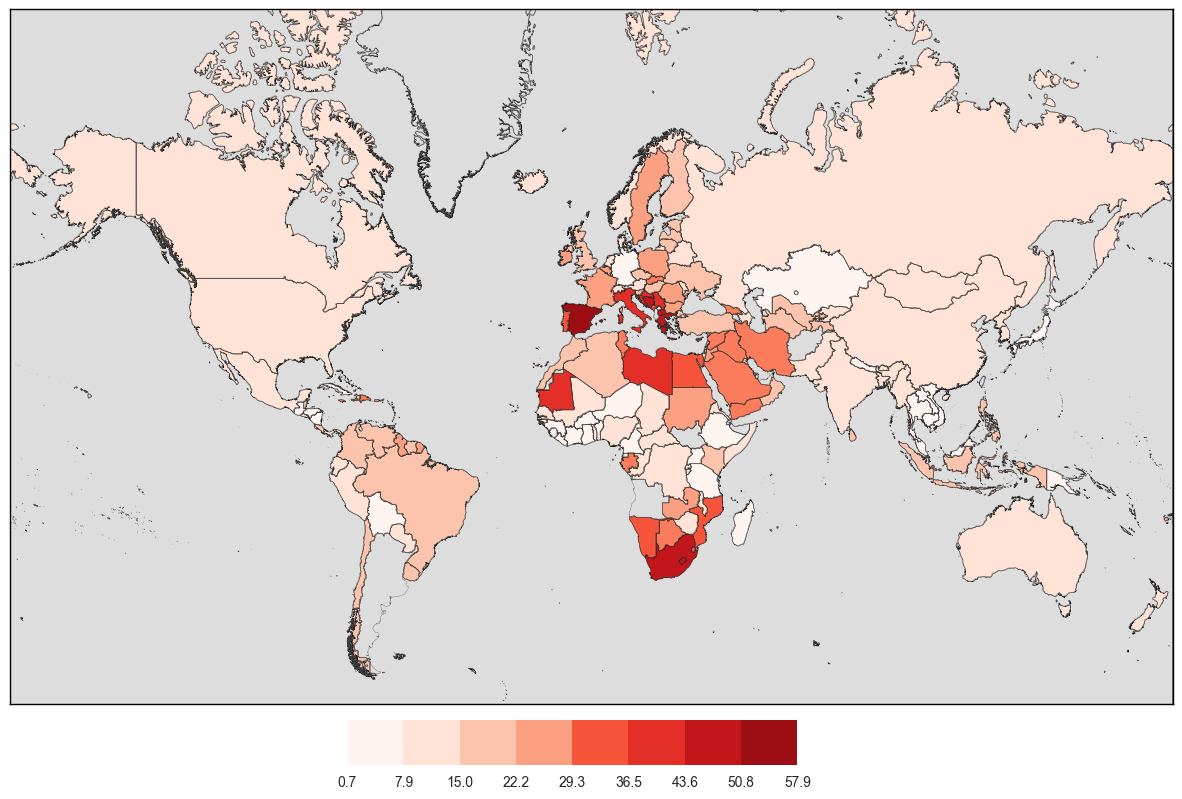

In [10]:
codes = yu['Country Code'].unique()
codes.tolist()
yu.set_index('Country Code', inplace=True)
yu = yu.ix[iso3_codes].dropna()

num_colors = 9

values = yu['2014']
cm = plt.get_cmap('Reds')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
yu['bin'] = np.digitize(values, bins) - 1

fig = plt.figure(1,figsize = (15,15))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
map = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
map.drawmapboundary(fill_color="w")

shapefile = '../data-visualization/ne_10m_admin_0_countries/ne_10m_admin_0_countries'
map.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(map.units_info, map.units):
    iso3 = info['ADM0_A3']
    if iso3 not in codes:
        color = '#dddddd'
    else:
        color = scheme[yu.ix[iso3]['bin']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
        
ax_legend = fig.add_axes([0.35, 0.24, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
plt.show()

In [35]:
wb = pd.read_csv('../data-visualization/world-development-indicators/Indicators.csv')
wb_country  = wb.copy()
wb_country.set_index('CountryName',inplace = True)

In [71]:
wb.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [64]:
wb_indicator = wb.copy()
indicator = wb_indicator['IndicatorName'].unique()
num_indicator = indicator.shape[0]

In [65]:
wb_indicator = wb_indicator.groupby(['IndicatorName'])

In [101]:
cols = ['IndicatorCode','IndicatorName','NumCountries','NumYears','FirstYear','LastYear']
table_indicators = pd.DataFrame(columns=cols)
for i in range(0,num_indicator):
    temp = wb_indicator.get_group(indicator[i])
    temp = temp.reset_index(drop=True)
    indicatorname = indicator[i]
    numcountries = temp['CountryName'].unique().shape[0]
    numyears = temp['Year'].unique().shape[0]
    firstyear = np.min(np.array(temp['Year']))
    lastyear = np.max(np.array(temp['Year']))
    indicatorcode = temp.ix[0]['IndicatorCode']
    entry = pd.DataFrame([[indicatorcode,indicatorname,numcountries,numyears,firstyear,lastyear]],columns=cols)
    table_indicators = table_indicators.append(entry)

table_indicators[['NumCountries','NumYears','FirstYear','LastYear']] = table_indicators[['NumCountries','NumYears','FirstYear','LastYear']].astype('int')

List of Indicators in the Worls Bank Dataset

In [103]:
table_indicators = table_indicators.reset_index(drop=True)
table_indicators.head(10)

,IndicatorCode,IndicatorName,NumCountries,NumYears,FirstYear,LastYear
0,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo...",227,55,1960,2014
1,SP.POP.DPND,Age dependency ratio (% of working-age populat...,228,55,1960,2014
2,SP.POP.DPND.OL,"Age dependency ratio, old (% of working-age po...",228,55,1960,2014
3,SP.POP.DPND.YG,"Age dependency ratio, young (% of working-age ...",228,55,1960,2014
4,MS.MIL.XPRT.KD,Arms exports (SIPRI trend indicator values),151,55,1960,2014
5,MS.MIL.MPRT.KD,Arms imports (SIPRI trend indicator values),217,55,1960,2014
6,SP.DYN.CBRT.IN,"Birth rate, crude (per 1,000 people)",243,54,1960,2013
7,EN.ATM.CO2E.KT,CO2 emissions (kt),232,52,1960,2011
8,EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita),232,52,1960,2011
9,EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (%...,232,52,1960,2011
